In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.describe()

,Serial No.,PCMB Score,SS Score,School Rating,SOP,LOR,CGPA,Extra Act,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


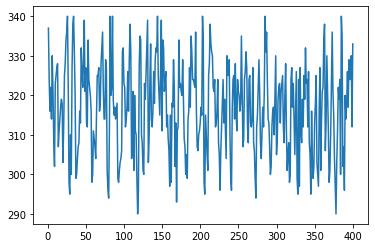

In [3]:
plt.plot(df['Serial No.'], df['PCMB Score'])
plt.show()

In [4]:
# BE CAUTIOUS, RUN This CELL ONLY ONCE
#df['CGPA'] = df['CGPA'].apply(lambda x: x * 10)
#df['PCMB Score'] = df['PCMB Score'].apply(lambda x: x + 60)
#df['SS Score'] = df['SS Score'].apply(lambda x: x + 80)

In [5]:
df.describe()

,Serial No.,PCMB Score,SS Score,School Rating,SOP,LOR,CGPA,Extra Act,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


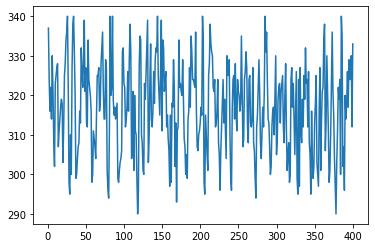

In [6]:
plt.plot(df['Serial No.'], df['PCMB Score'])
plt.show()

## Data Analysis

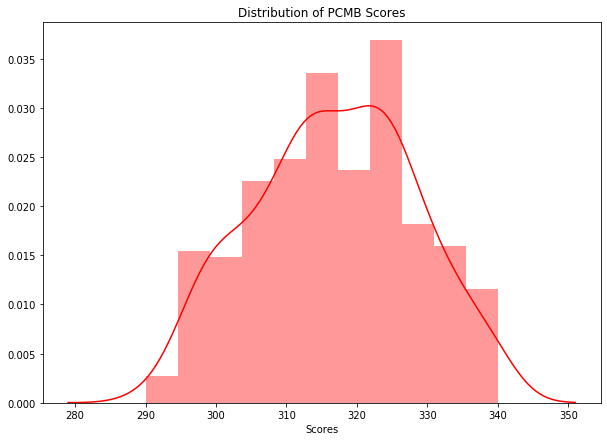

In [115]:
plt.figure(figsize = (10,7))
sns.distplot(df['PCMB Score'],kde=True,color='red')
plt.title('Distribution of PCMB Scores')
plt.xlabel('Scores')
plt.show()

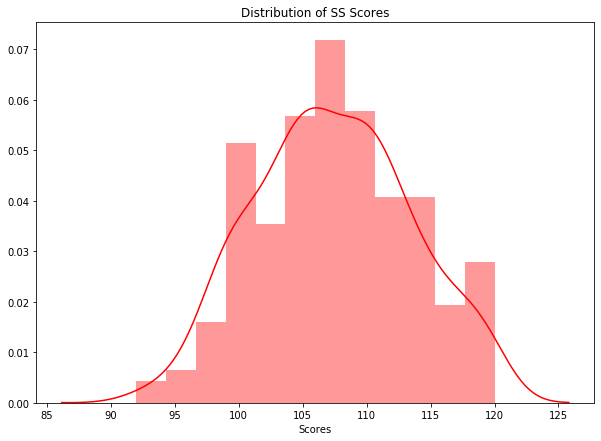

In [116]:
plt.figure(figsize = (10,7))
sns.distplot(df['SS Score'],kde=True,color='red')
plt.title('Distribution of SS Scores')
plt.xlabel('Scores')
plt.show()

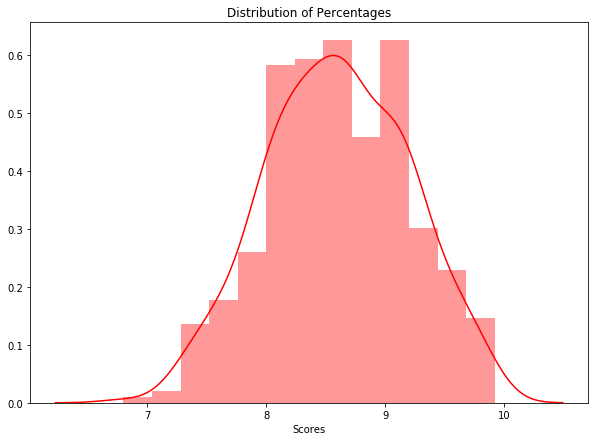

In [117]:
plt.figure(figsize = (10,7))
sns.distplot(df['CGPA'],kde=True,color='red')
plt.title('Distribution of Percentages')
plt.xlabel('Scores')
plt.show()

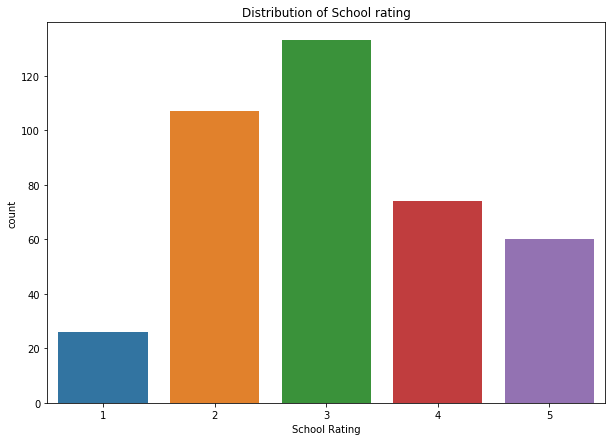

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(df['School Rating'])
plt.xlabel('School Rating')
plt.title('Distribution of School rating')
plt.show()

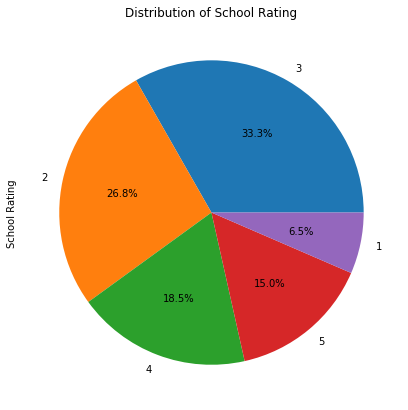

In [119]:
plt.title("Distribution of School Rating")
df['School Rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,7)) 
plt.show()

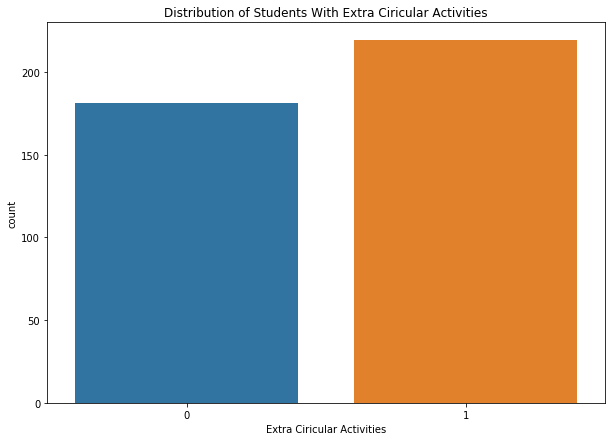

In [120]:
plt.figure(figsize=(10,7))
sns.countplot(df['Extra Act'])
plt.xlabel('Extra Ciricular Activities')
plt.title('Distribution of Students With Extra Ciricular Activities')
plt.show()

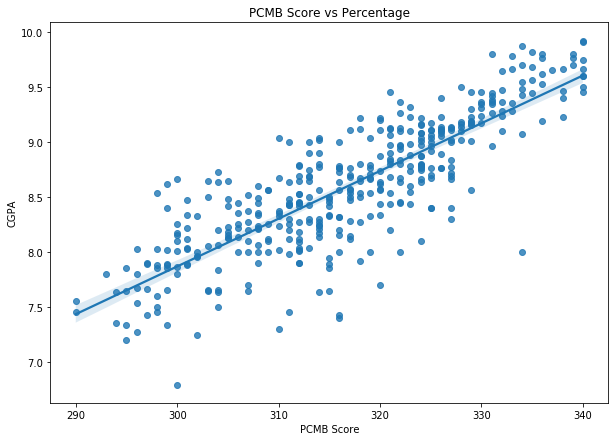

In [121]:
plt.figure(figsize=(10,7))
fig = sns.regplot(x="PCMB Score", y="CGPA", data=df)
plt.title("PCMB Score vs Percentage")
plt.show()

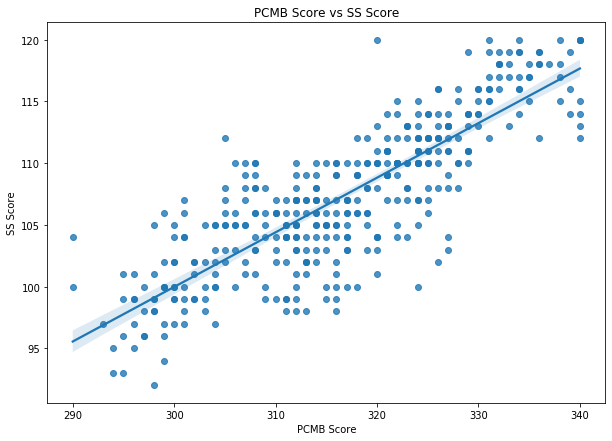

In [122]:
plt.figure(figsize=(10,7))
fig = sns.regplot(x=df["PCMB Score"], y=df["SS Score"])
plt.title("PCMB Score vs SS Score")
plt.show()

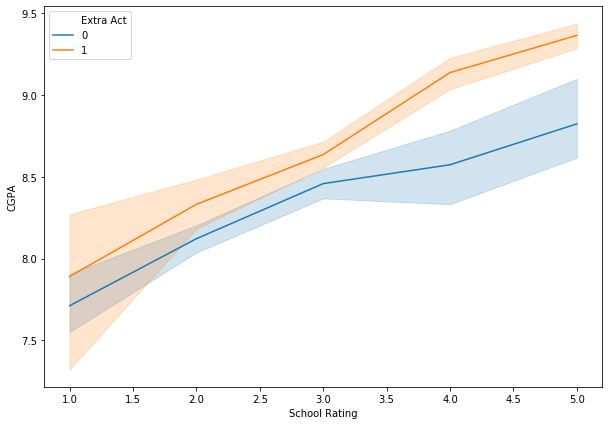

In [123]:
plt.figure(figsize=(10,7))
sns.lineplot(y="CGPA", x="School Rating",
             hue="Extra Act",data=df)
plt.show()

## Model Training 


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

In [8]:
X = df[['CGPA','PCMB Score','SS Score','Extra Act','School Rating']]
Y = df[['Chance of Admit']]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pred = reg.predict(X_test)

In [13]:
mse=metrics.mean_squared_error(Y_test,pred)
mse

0.005115926455561129

In [14]:
X_test

,CGPA,PCMB Score,SS Score,Extra Act,School Rating
132,8.56,309,105,0,5
309,8.60,308,110,0,4
341,8.76,326,110,1,3
196,8.26,306,105,0,2
246,8.73,316,105,0,3
...,...,...,...,...,...
14,8.20,311,104,1,3
363,8.36,306,103,0,2
304,8.43,313,106,0,2
361,9.54,334,116,1,4


In [15]:
Y_test

,Chance of Admit
132,0.71
309,0.70
341,0.79
196,0.73
246,0.72
...,...
14,0.61
363,0.69
304,0.62
361,0.93


In [16]:
user_input = [[9.54,334,116,1,1]] #user input from testing data  #while passing op, give(6-rating)
user_pred = reg.predict(user_input)
print((user_pred.flatten()*100).astype(float))

[88.89085286]


In [107]:
user_input = [[8.56,309,105,0,2]] #user input from testing data
user_pred = reg.predict(user_input)
print(user_pred)

[[0.67237485]]


In [18]:
user_input = [[9.54,334,116,1,5]] #user input from testing data
user_pred = reg.predict(user_input)
print((user_pred.flatten()*100).astype(float))

[93.40513794]


In [134]:
import pickle

In [135]:
pickle.dump(reg,open('model.pkl','wb'))